# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')


# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Checking the number of mice.
num_mice = merged_df['Mouse ID'].nunique()
num_mice

249

In [18]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_df[merged_df["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data['Mouse ID'].nunique()
num_mice_clean

248

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# changing the names of the columns to make more aesthetically pleasing
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume SEM'
})

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

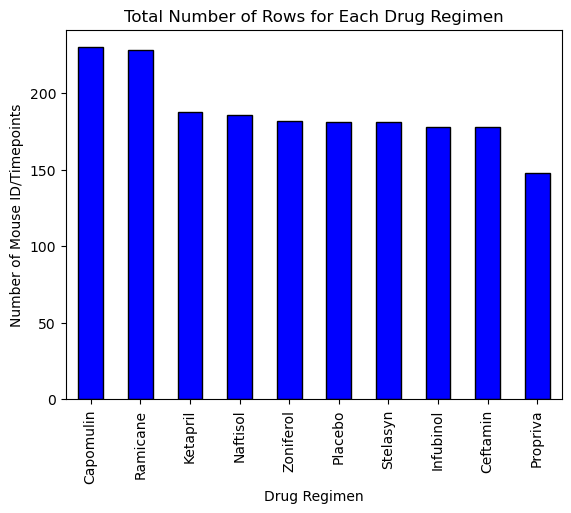

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_per_regimen = clean_data['Drug Regimen'].value_counts()

# Using the dat we will create a bar plot
count_per_regimen.plot(kind='bar', color='blue', edgecolor='black')

# x,y labels and plot title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen', fontsize = 12)

# Show the plot
plt.show()

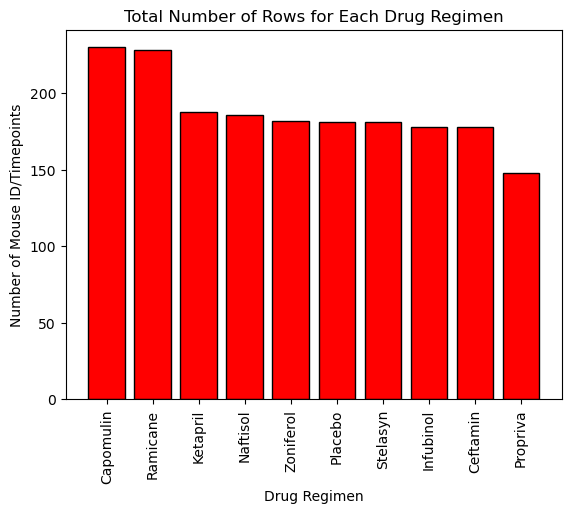

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(count_per_regimen.index, count_per_regimen, color='red', edgecolor='black')

# x, y labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')

# Rotate x-axis 
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

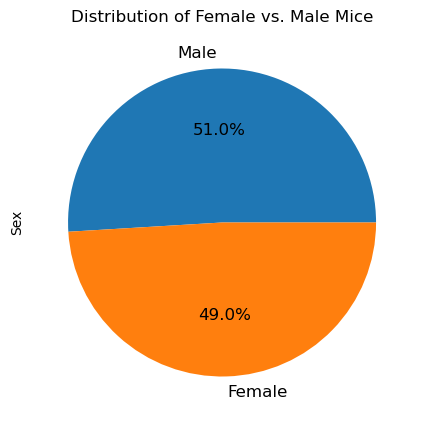

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_comparison = clean_data['Sex'].value_counts()
gender_comparison.plot(kind = "pie", y = "Sex", autopct="%1.1f%%", fontsize=12, figsize=(5, 5))
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('Sex')
plt.show()


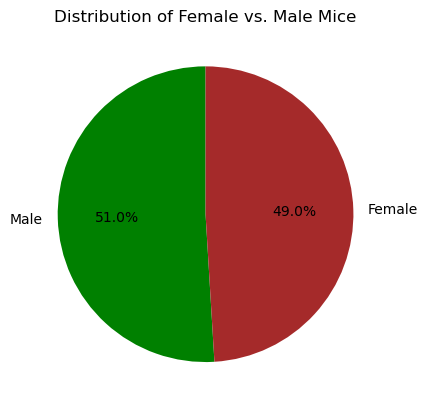

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_comparison = clean_data['Sex'].value_counts()


plt.pie(gender_comparison, labels=gender_comparison.index, autopct='%1.1f%%', colors=['green', 'brown'], startangle=90)


plt.title('Distribution of Female vs. Male Mice')


plt.show()


## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_data[clean_data['Drug Regimen'].isin(treatment_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()
last_timepoints_df = pd.DataFrame(last_timepoints)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints_df, clean_data, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [43]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

for treatment in treatments:
    tumor_volume = clean_data.loc[clean_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    # Add subset to the list
    tumor_volume_data.append(tumor_volume)
    
    tumor_volume_data.append(tumor_volume)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr


    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    print(f"Results for {treatment}:")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]}\n")


Results for Capomulin:
IQR: 7.314067135000002
Lower Bound: 26.714832162499995
Upper Bound: 55.9711007025
Potential Outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64

Results for Ramicane:
IQR: 8.325365415
Lower Bound: 24.1865864625
Upper Bound: 57.488048122500004
Potential Outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64

Results for Infubinol:
IQR: 10.002090667500006
Lower Bound: 32.309217298749985
Upper Bound: 72.31757996875001
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Results for Ceftamin:
IQR: 9.593010457500007
Lower Bound: 32.81891142624998
Upper Bound: 71.19095325625001
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



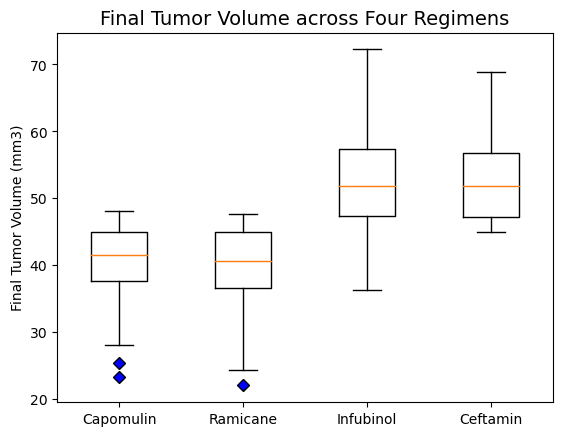

In [52]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the data for the specified treatments
data_by_treatment = [clean_data[clean_data['Drug Regimen'].isin([treatment])]['Tumor Volume (mm3)'] for treatment in treatments]

# box plot with custom labels and blue diamond marker for outliers
fig, ax = plt.subplots()
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.boxplot(data_by_treatment, flierprops=dict(markerfacecolor='b', marker='D'))
ax.set_title("Final Tumor Volume across Four Regimens", fontsize=14)
ax.set_xticklabels(treatments)



# Show the plot
plt.show()


## Line and Scatter Plots

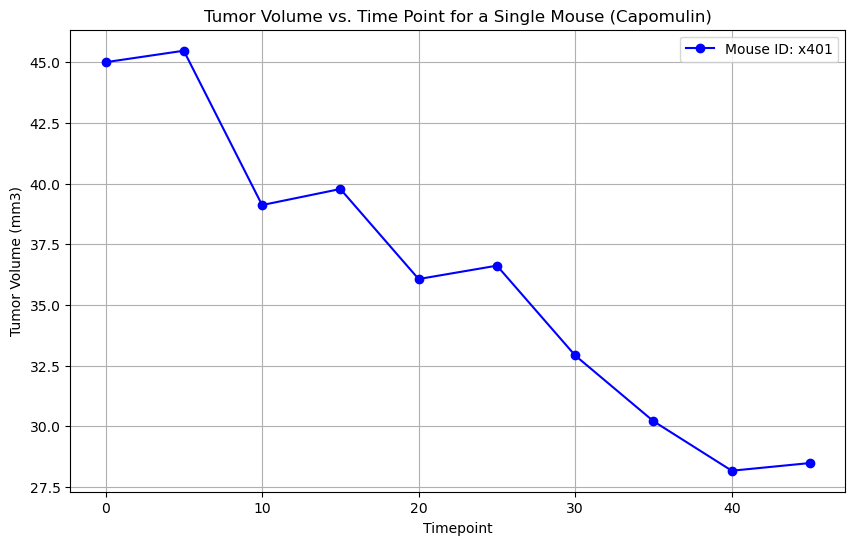

In [54]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_id = "x401"

# Filter the data for the selected mouse treated with Capomulin
single_mouse_data = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == single_mouse_id)]

# Create a line plot for tumor volume vs. time point using pyplot
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue', label=f'Mouse ID: {single_mouse_id}')
plt.title('Tumor Volume vs. Time Point for a Single Mouse (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()


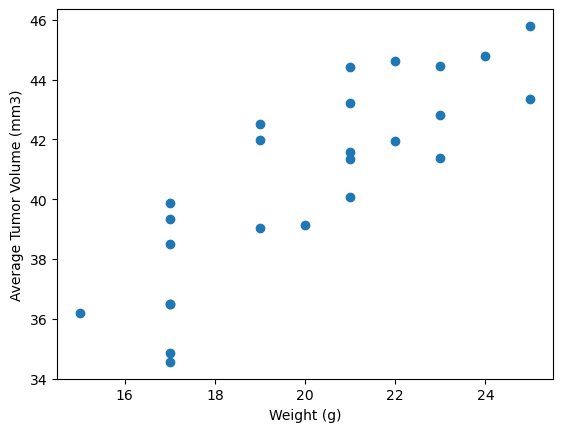

In [57]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_rg = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
mouse_weight = capomulin_rg["Weight (g)"].unique()
averag_tumor = capomulin_rg["Tumor Volume (mm3)"].mean()
plt.scatter(mouse_weight, averag_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


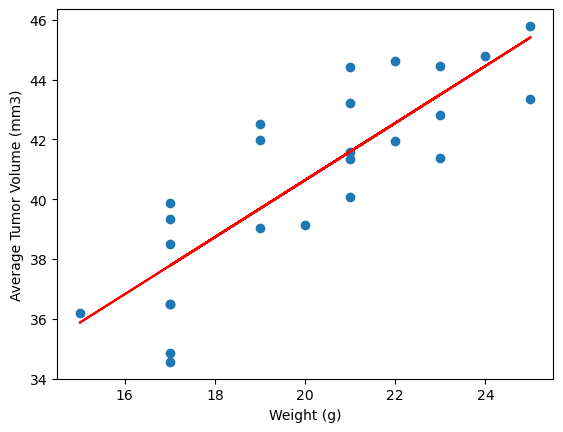

In [60]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, averag_tumor)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, averag_tumor)
regress_value = mouse_weight * slope + intercept
linear_formula = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, averag_tumor)
plt.plot(mouse_weight,regress_value,"r-")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()
